# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [4]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsx",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [3]:
from google.colab import files
uploaded = files.upload()


Saving stc TV Data Set_T2.xlsx to stc TV Data Set_T2.xlsx


In [5]:
df=dataframe.copy()

In [6]:
# check the data shape
dataframe.shape

(86, 2)

In [7]:
# display the first 5 rows
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [8]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [9]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [10]:
# check if any column has null value in the dataset
dataframe.isnull().any()

,0
date_,False
Total_watch_time_in_houres,False


In [11]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [13]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [14]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [ ]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

'\nTODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n'

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [16]:
# نحدد العمود اللي فيه وقت المشاهدة
y = df['Total_watch_time_in_houres']

In [17]:
# نبني نموذج التنبؤ بناءً على اتجاه خطي (trend)
model = ExponentialSmoothing(y, trend='add', seasonal=None)
fit_model = model.fit()


In [18]:
# نتنبأ لـ 60 يوم قدام (شهرين)
forecast = fit_model.forecast(60)

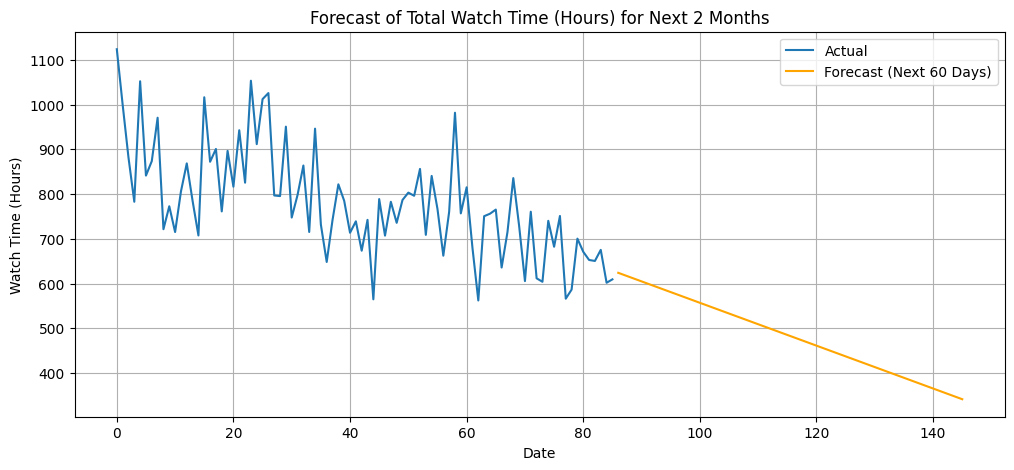

In [19]:
# نرسم التوقع والخط الحقيقي
plt.figure(figsize=(12,5))
plt.plot(y, label='Actual')
plt.plot(forecast, label='Forecast (Next 60 Days)', color='orange')
plt.title("Forecast of Total Watch Time (Hours) for Next 2 Months")
plt.xlabel("Date")
plt.ylabel("Watch Time (Hours)")
plt.legend()
plt.grid(True)
plt.show()